In [31]:
import pandas as pd
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.layers import Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt

In [32]:
# Загрузка данных
df = pd.read_csv("/content/train.txt", delimiter=';', header=None, names=['sentence', 'label'])
val_df = pd.read_csv("/content/val.txt", delimiter=';', header=None, names=['sentence', 'label'])
ts_df = pd.read_csv("/content/test.txt", delimiter=';', header=None, names=['sentence', 'label'])

In [33]:
# Предварительный анализ данных
print("Train data:")
print(df.head())
print("\nValidation data:")
print(val_df.head())
print("\nTest data:")
print(ts_df.head())

Train data:
                                            sentence    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

Validation data:
                                            sentence    label
0  im feeling quite sad and sorry for myself but ...  sadness
1  i feel like i am still looking at a blank canv...  sadness
2                     i feel like a faithful servant     love
3                  i am just feeling cranky and blue    anger
4  i can have for a treat or if i am feeling festive      joy

Test data:
                                            sentence    label
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate

In [34]:
# Объединение всех текстовых данных
all_texts = df['sentence'].tolist() + val_df['sentence'].tolist() + ts_df['sentence'].tolist()

In [35]:
# Определение максимальной длины последовательности
maxlen = max([len(text.split()) for text in all_texts])

In [36]:
# Создание объекта Tokenizer и преобразование текста в последовательности
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_texts)

In [37]:
# Определение размера словаря
vocab_size = len(tokenizer.word_index) + 1  # добавляем 1 для учета паддинга

In [38]:
# Определение размерности эмбеддингов
embedding_dim = 100  # Примерное значение, можно изменить

In [39]:
print("Максимальная длина последовательности:", maxlen)
print("Размер словаря:", vocab_size)

Максимальная длина последовательности: 66
Размер словаря: 17097


In [40]:
# Преобразование текстовых данных в числовые последовательности
X_train_sequences = tokenizer.texts_to_sequences(df['sentence'])
X_val_sequences = tokenizer.texts_to_sequences(val_df['sentence'])
X_test_sequences = tokenizer.texts_to_sequences(ts_df['sentence'])

In [41]:
# Подготовка входных данных путем дополнения последовательностей до одной и той же длины
X_train = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_val = pad_sequences(X_val_sequences, maxlen=maxlen, padding='post')
X_test = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

In [42]:
# Кодирование меток классов
label_dict = {'joy': 0, 'sadness': 1, 'anger': 2, 'fear': 3, 'love': 4, 'surprise': 5}
y_train = to_categorical(df['label'].map(label_dict))
y_val = to_categorical(val_df['label'].map(label_dict))
y_test = to_categorical(ts_df['label'].map(label_dict))

In [43]:
# Проверка размерностей данных
print("Размерность X_train:", X_train.shape)
print("Размерность y_train:", y_train.shape)
print("Размерность X_val:", X_val.shape)
print("Размерность y_val:", y_val.shape)
print("Размерность X_test:", X_test.shape)
print("Размерность y_test:", y_test.shape)

Размерность X_train: (16000, 66)
Размерность y_train: (16000, 6)
Размерность X_val: (2000, 66)
Размерность y_val: (2000, 6)
Размерность X_test: (2000, 66)
Размерность y_test: (2000, 6)


In [44]:
# Определение архитектуры сети
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(6, activation='softmax', kernel_initializer='glorot_uniform'))

In [45]:
# Компиляция модели (оптимизация и функция потерь)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
# Вывод информации о модели
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 66, 100)           1709700   
                                                                 
 flatten_1 (Flatten)         (None, 6600)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                422464    
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 6)                 198       
                                                                 
Total params: 2134442 (8.14 MB)
Trainable params: 2134442 (8.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [47]:
# Определение скорости обучения
optimizer = Adam(lr=0.001)

In [48]:
# Компиляция модели с определенной скоростью обучения
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
# Вывод информации о модели
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 66, 100)           1709700   
                                                                 
 flatten_1 (Flatten)         (None, 6600)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                422464    
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 6)                 198       
                                                                 
Total params: 2134442 (8.14 MB)
Trainable params: 2134442 (8.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [50]:
# Обучение модели с использованием метода fit
# Оптимизация весов происходит автоматически во время обучения
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
500/500 [==============================] - 24s 45ms/step - loss: 1.3201 - accuracy: 0.4904 - val_loss: 0.7212 - val_accuracy: 0.7705
Epoch 2/10
500/500 [==============================] - 19s 38ms/step - loss: 0.3426 - accuracy: 0.8886 - val_loss: 0.3840 - val_accuracy: 0.8670
Epoch 3/10
500/500 [==============================] - 24s 47ms/step - loss: 0.0864 - accuracy: 0.9738 - val_loss: 0.4379 - val_accuracy: 0.8610
Epoch 4/10
500/500 [==============================] - 24s 49ms/step - loss: 0.0403 - accuracy: 0.9897 - val_loss: 0.4591 - val_accuracy: 0.8660
Epoch 5/10
500/500 [==============================] - 20s 39ms/step - loss: 0.0237 - accuracy: 0.9934 - val_loss: 0.4943 - val_accuracy: 0.8630
Epoch 6/10
500/500 [==============================] - 22s 45ms/step - loss: 0.0182 - accuracy: 0.9954 - val_loss: 0.5756 - val_accuracy: 0.8560
Epoch 7/10
500/500 [==============================] - 20s 41ms/step - loss: 0.0148 - accuracy: 0.9959 - val_loss: 0.6119 - val_accuracy:

In [51]:
# Оценка модели на тестовом наборе данных
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

63/63 [==============================] - 0s 5ms/step - loss: 0.8217 - accuracy: 0.8275
Test Loss: 0.8217040300369263
Test Accuracy: 0.8274999856948853


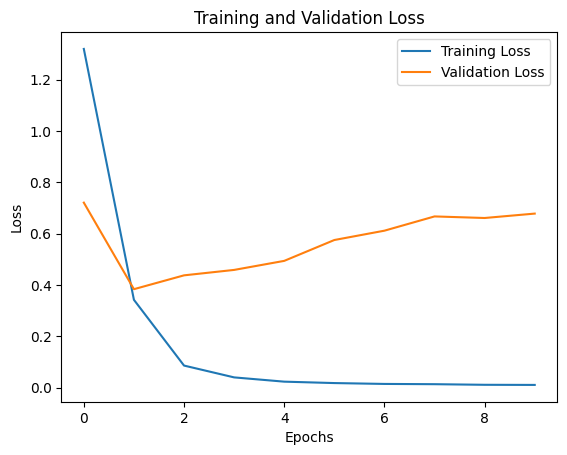

In [52]:
# Визуализация функции потерь на тренировочном и валидационном наборах данных
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

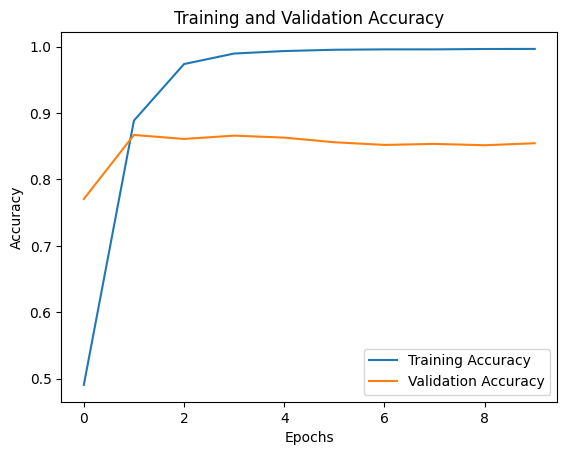

In [53]:
# Визуализация точности на тренировочном и валидационном наборах данных
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [54]:
# Предсказание вероятностей для каждого класса на тестовом наборе данных
y_pred_prob = model.predict(X_test)

63/63 [==============================] - 1s 9ms/step


In [55]:
# Преобразование вероятностей в метки классов
y_pred = np.argmax(y_pred_prob, axis=1)

In [56]:
# Вывод отчета о классификации и матрицы ошибок
print("Classification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test.argmax(axis=1), y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       695
           1       0.86      0.86      0.86       581
           2       0.80      0.80      0.80       275
           3       0.84      0.71      0.77       224
           4       0.73      0.61      0.67       159
           5       0.59      0.77      0.67        66

    accuracy                           0.83      2000
   macro avg       0.78      0.78      0.77      2000
weighted avg       0.83      0.83      0.83      2000

Confusion Matrix:
[[625  18   3   5  32  12]
 [ 35 502  32   9   2   1]
 [ 14  28 221  10   0   2]
 [  4  23  18 159   1  19]
 [ 49   9   1   1  97   2]
 [  7   2   1   5   0  51]]
